Information density
================

When using uncertainty sampling (or other similar strategies), we are unable to take the structure of the data into account. This can lead us to suboptimal queries. To alleviate this, one method is to use information density measures to help us guide our queries.

For an unlabeled dataset $X_{u}$, the information density of an instance $x$ can be calculated as

$$ I(x) = \frac{1}{|X_{u}|} \sum_{x^\prime \in X} sim(x, x^\prime),$$

where $sim(x, x^\prime)$ is a similarity function such as [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) or Euclidean similarity, which is the reciprocal of [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance). The higher the information density, the more similar the given instance is to the rest of the data. To illustrate this, we shall use a simple synthetic dataset.

For more details, see Section 5.1 of the [Active Learning book by Burr Settles](https://www.morganclaypool.com/doi/abs/10.2200/S00429ED1V01Y201207AIM018)!

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_features=2, n_samples=1000, centers=3, random_state=0, cluster_std=0.7)

In [2]:
from modAL.density import similarize_distance, information_density
from scipy.spatial.distance import euclidean

cosine_density = information_density(X)
euclidean_density = information_density(X, similarize_distance(euclidean))

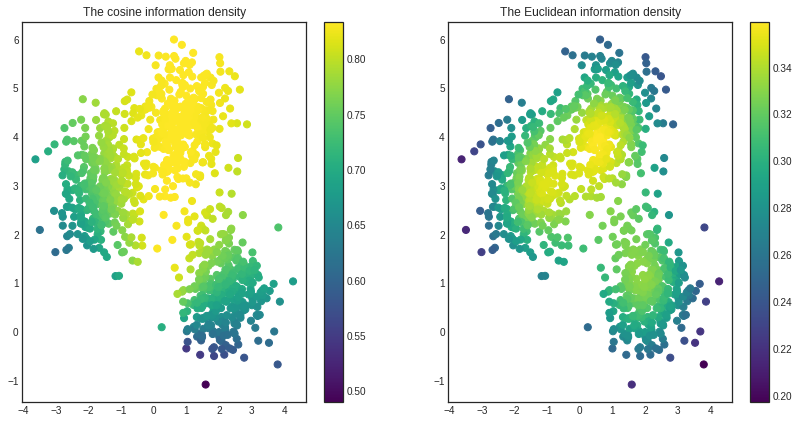

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# visualizing the cosine and euclidean information density
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.scatter(x=X[:, 0], y=X[:, 1], c=cosine_density, cmap='viridis', s=50)
    plt.title('The cosine information density')
    plt.colorbar()
    plt.subplot(1, 2, 2)
    plt.scatter(x=X[:, 0], y=X[:, 1], c=euclidean_density, cmap='viridis', s=50)
    plt.title('The Euclidean information density')
    plt.colorbar()
    plt.show()

As you can see, the certain similarity functions highlight distinct features of the dataset. The Euclidean information density prefers the center of clusters, while the cosine describes the middle cluster as most important.